# Chapter 1. Introduction

## Encoding - Data Representation

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

In [2]:
corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

### One Hot Encoding

<AxesSubplot:>

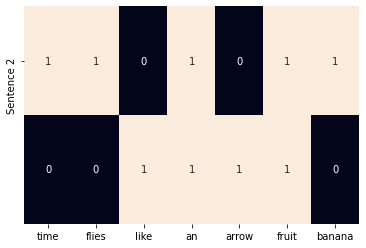

In [3]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = [*one_hot_vectorizer.vocabulary_]
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 2'])

### TF-IDF 
* TFIDF = TF(W) * IDF(W)
* IDF(W) = log(N/nw) nw is the number of documents containing the word w and N is the total number of documents

<AxesSubplot:>

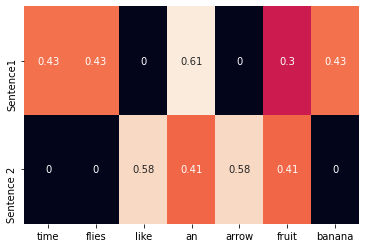

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
vocab = [*tfidf_vectorizer.vocabulary_]
sns.heatmap(tfidf, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence1','Sentence 2'])

In deep learning, it is rate to see inputs encoded using heuristic representations like TF-IDF because the goal is to learn representations. Often, we start with a one-hot encoding using integer indices and a special "embedding lookup" layer to construct inputs to the neural network. In later chapters, we present several examples of doing this.

## Computational Graphs: PyTorch Basics

In this section, we take our first steps with PyTorch to familiarize you with various PyTorch operations. These include:
* Creating tensors
* Operations with tensors
* Indexing, slicing and joining with tensors
* Computing gradients with tensors
* Using CUDA tensors with GPUs

### Creating Tensors

First, we define a helper function, describe(x), that will summarize various properties of a tensor x, such as the type of the tensor, the dimensions of the tensor, and the contents of the tensor:

In [5]:
import torch

def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

#### Creating a tensor in PyTorch with torch.Tensor

In [6]:
describe(torch.Tensor([1,2]))

Type: torch.FloatTensor
Shape/size: torch.Size([2])
Values: 
tensor([1., 2.])


#### Creating a randomly initialized tensor

We can also create a tensor by randomly initializing it with values from a uniform distribution on the interval [0, 1) or the standard normal distribution

In [7]:
describe(torch.rand(2, 3))      # uniform random
describe(torch.randn(2, 3))     # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.8969, 0.4595, 0.0650],
        [0.6684, 0.4840, 0.4289]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 1.3613,  0.1360, -0.3918],
        [ 0.9139,  0.3070,  0.2277]])


#### Creating a filled tensor

We can also create tensors all filled with the same scalar. For creating a tensor of zeros or ones, we have built-in functions, and for filling it with specific values, we can use the fill_() method. Any PyTorch method with an underscore (_) refers to an in-place operation; that is, it modifies the content in place without creating a new object

In [8]:
describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


#### Creating and initializing a tensor from list

In [9]:
x  = torch.Tensor([[1, 2, 3],
                   [4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### Creating and initializing a tensor from NumPy

The ability to convert between NumPy and PyToch becomes important when working with legacy libraries that use NumPy-formatted numerical values

In [10]:
import numpy as np 

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.6111, 0.7468, 0.2489],
        [0.7366, 0.3846, 0.7081]], dtype=torch.float64)


### Tensor Types and Size

The default tensor type when you use the torch.Tensor constructor is torch.FloatTensor. However, you can convert a tensor to a different type (float, long, double, etc.) by specifying it at initializaion or later using one of the forecasting methods.

In [11]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [12]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [13]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [14]:
x = x.float()
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


### Tensor Operations

After you have created your tensors, you can operate on them like you would do with traditional programming language types, like +, -, *, /. Instead of the operators, you can also use functions like .add()

#### Tensor operations: addition

In [15]:
x = torch.randn(2, 3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.6866,  0.6288, -0.5503],
        [ 0.8975,  1.6469, -0.6150]])


In [16]:
describe(torch.add(x, x))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.3731,  1.2575, -1.1006],
        [ 1.7949,  3.2939, -1.2300]])


In [17]:
describe(x + x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.3731,  1.2575, -1.1006],
        [ 1.7949,  3.2939, -1.2300]])


#### Dimension based tensor operations

There are also operations that you can apply to a specific dimension of a tensor. As you might have already noticed, for a 2D tensor we represent rows as the dimension 0 and columns as dimension 1,

In [18]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [19]:
x = x.view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
describe(torch.sum(x, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [21]:
describe(torch.sum(x, dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3, 12])


In [22]:
describe(torch.transpose(x, 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


#### Indexing, Slicing and Joining

Often, we need to do more complex operations that involve a combination of indexing, slicing, joining, and mutations. Like NumPy and other numeric libraries, PyTorch has built-in functions to make such tensor manipulations very simple.

In [23]:
x = torch.arange(6).view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [24]:
describe(x[:1, :2])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])


In [25]:
describe(x[0, 1])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
1


#### Complex indexing: noncontinguous indexing of a tensor

PyTorch also has functions for complex indexing and slicing operations, where you might be interested in accessing noncontiguous locations of a tensor efficiently.

In [26]:
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])


In [27]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [28]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])


Notice that the indices are a LongTensor; this is a requirement for indexing using PyTorch functions. We can also join tensors using built-in concatenation functions, as shown

#### Concatenating Tensors

In [29]:
x = torch.arange(6).view(2,3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [30]:
describe(torch.cat([x, x], dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [31]:
describe(torch.cat([x, x], dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [32]:
describe(torch.stack([x, x]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


#### Linear algebra on tensors: Multiplication

PyTorch also implements highly efficient linear algebra operations on tensors, such as multiplication, inverse, and trace

In [33]:
x1 = torch.arange(6).view(2,3)
x1 = x1.float() 
describe(x1)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [34]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [35]:
describe(torch.mm(x1, x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])


### Tensors and Computational Graphs

PyTorch tensor class encapsulates the data (the tensor itself) and a range of operations, such as algebraic operations, indexing, and reshaping operations. However, as shown next, when the *requires_grad* Boolean flag is set to True on a tensor, bookkeeping operations are enabled that can track the gradient at the tensor as well as the gradient function, both of which are needed to facilitate the gradient-based learning discussed in “The Supervised Learning Paradigm”.

#### Creating tensors for gradient bookkeeping

In [36]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [37]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [38]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


### CUDA Tensors

So far, we have been allocating our tensors on the CPU memory. When doing linear algebra operations, it might make sense to utilize a GPU, if you have one. To use a GPU, you need to first allocate the tensor on the GPU’s memory. Access to the GPUs is via a specialized API called CUDA. The CUDA API was created by NVIDIA and is limited to use on only NVIDIA GPUs. PyTorch offers CUDA tensor objects that are indistinguishable in use from the regular CPU-bound tensors except for the way they are allocated internally.

PyTorch makes it very easy to create these CUDA tensors, transfering the tensor from the CPU to the GPU while maintaining its underlying type. The preferred method in PyTorch is to be device agnostic and write code that works whether it’s on the GPU or the CPU. In next example, we first check whether a GPU is available by using torch.cuda.is_available(), and retrieve the device name with torch.device(). Then, all future tensors are instantiated and moved to the target device by using the .to(device) method.

In [39]:
print(torch.cuda.is_available())

True


In [40]:
# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [41]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1.2091e-01, 4.9373e-01, 5.9980e-01],
        [5.9325e-04, 7.5058e-02, 6.3323e-01],
        [4.3157e-01, 9.0282e-01, 4.7180e-01]], device='cuda:0')


#### Mixing CUDA tensors with CPU-bound tensors

To operate on CUDA and non-CUDA objects, we need to ensure that they are on the same device. If we don’t, the computations will break, as shown in next example. This situation arises when computing monitoring metrics that aren’t part of the computational graph, for instance. When operating on two tensor objects, make sure they’re both on the same device.

In [42]:
y = torch.rand(3, 3)
x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [84]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.6788, 1.1022, 0.4997],
        [1.2782, 1.0794, 1.5758],
        [0.7502, 1.2195, 0.2976]])

Keep in mind that it is expensive to move data back and forth from the GPU. Therefore, the typical procedure involves doing many of the parallelizable computations on the GPU and then transferring just the final result back to the CPU. This will allow you to fully utilize the GPUs. If you have several CUDA-visible devices (i.e., multiple GPUs), the best practice is to use the CUDA_VISIBLE_DEVICES environment variable when executing the program, as shown here:

CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py

We do not cover parallelism and multi-GPU training as a part of this book, but they are essential in scaling experiments and sometimes even to train large models. We recommend that you refer to the PyTorch documentation and discussion forums for additional help and support on this topic.

